In [1]:
# Donwload if not downloaded
# !pip install matplotlib 
# !pip install numpy 
# !pip install tensorflow 

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

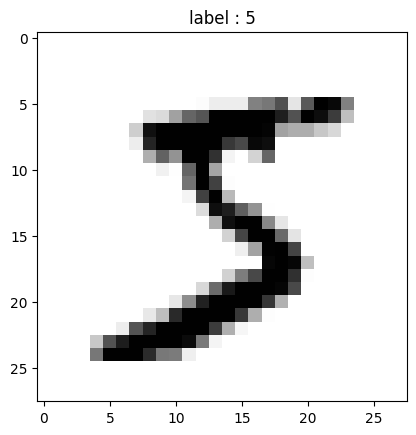

In [4]:
def display(i): 
    img = train_images[i] 
    plt.title('label : {}'.format(train_labels[i])) 
    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary) 
      
# image in TensorFlow is 28 by 28 px 
display(0) 

In [5]:
# Build the convolutional neural network model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/opt/anaconda3/envs/lpr_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.9901 - val_loss: 0.0351
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9954 - loss: 0.0134 - val_accuracy: 0.9907 - val_loss: 0.0328
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9964 - loss: 0.0100 - val_accuracy: 0.9927 - val_loss: 0.0275
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9978 - loss: 0.0081 - val_accuracy: 0.9919 - val_loss: 0.0341
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9964 - loss: 0.0092 - val_accuracy: 0.9917 - val_loss: 0.0286
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9978 - loss: 0.0066 - val_accuracy: 0.9925 - val_loss: 0.0358
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9902 - val_loss: 0.0467
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9979 - loss: 0

In [11]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 2ms/step - accuracy: 0.9922 - loss: 0.0403

Test accuracy: 0.9922000169754028


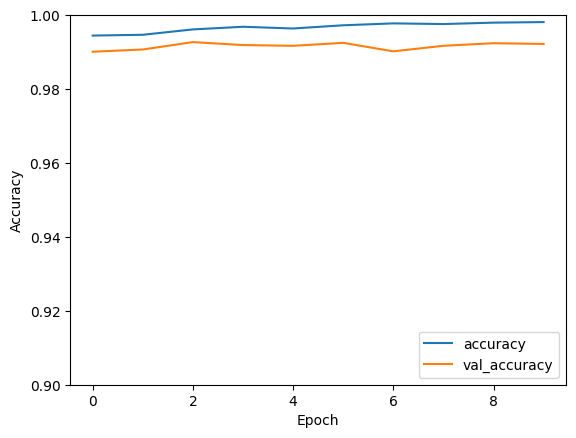

In [12]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


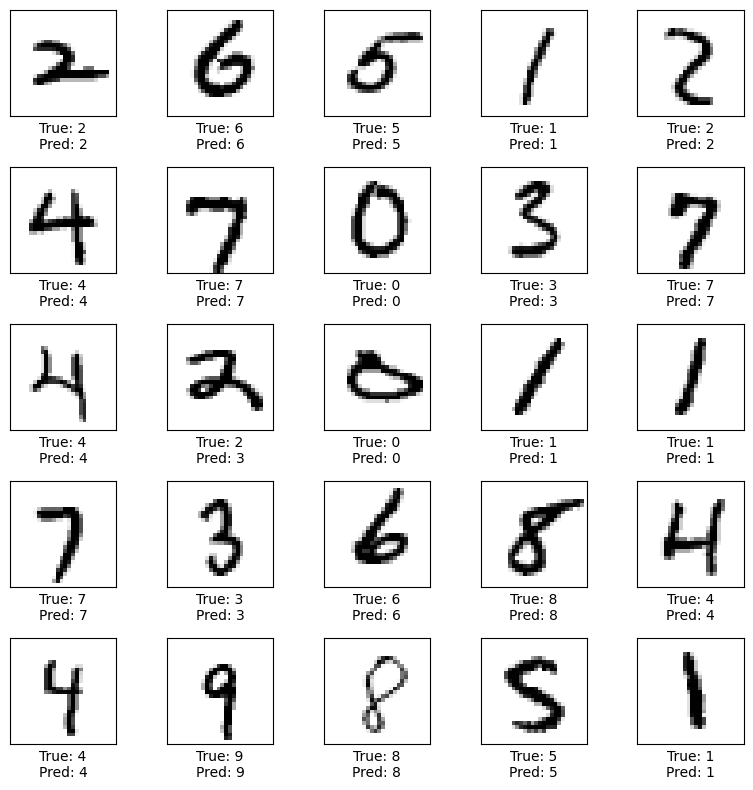

In [18]:
# Predict labels for test images
predictions = model.predict(test_images)

# Select 25 random test images
random_indices = np.random.choice(test_images.shape[0], 25, replace=False)
random_images = test_images[random_indices]
random_labels = test_labels[random_indices]
random_predictions = np.argmax(predictions[random_indices], axis=1)

# Plot 5x5 grid of images with true and predicted labels
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(random_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f'True: {random_labels[i]}\nPred: {random_predictions[i]}')
plt.tight_layout()

file_path = "5x5_grid_example.png"
plt.savefig(file_path)
plt.show()